## Pytorch MRI image class

The purpose of this notebook is to work out a class that I an consistently use for the super-resolution and just general image training of MRI and potentially other medical imaging data types.

It's become clear that everyone seems to have a different, unique, way of loading and organizing their data into a format that can be fed into a Pytorch `Dataset` for training a model. This can include creating intermediate `.png` images in order to limit memory usage/training time on personal hardware.

Goals for this tool:
1. Given an input folder, list all files that match a particular `prefix` and `suffix`
2. Display sample images from the list for assurance
3. Create randomly shuffled/altered images at different resolutions (gaussian blur, affine transformation, etc.)
    - Make the aspect of saving these images optional
4. Save any image generated in a specified format
5. Be given an input and output folder and generate list of matching data
6. Have locations of matching low and high resolution images (potentially a list for every x2 magnification)


Output file labeling protocol:
To keep things consistent I should probably create a labeling structure that is robust to future changes that I might want to make. This will most likely have to be stored in the string name, unless I want to make an intermediate file that is used as a key for the location of the files relative to the directory.

## Import necessary libraries

In [18]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os
import numpy as np
from PIL import Image
import random
import cv2
from matplotlib import pyplot
from skimage.transform import rotate, AffineTransform, warp, rescale

## Class definition

In [33]:
# The super resolution class:

class sr_gen():
    def __init__(self, inp_dir, HR_out_dir, LR_out_dir, prefix='', suffix=''):
        self.inp_dir = inp_dir
        self.HR_out_dir = HR_out_dir
        self.LR_out_dir = LR_out_dir
        self.inp_files = self.__get_inp__(prefix, suffix)
        self.template = self.get_template()

    def __get_inp__(self, prefix, suffix):
        # Get the original files that will be used to generate everything
        # Based on the prefix, for now this could be nifti files or png's.
        # Will have to write a "try" statement in order to check for file type
        files = []
        for fil in os.listdir(self.inp_dir):
            if fil.startswith(prefix) & fil.endswith(suffix):
                files.append(fil)
        
        if not files:
            raise FileNotFoundError('No applicable files found in input directory')

        return files

    def __get_LR_out__(self):
        # get list of files in output directory and determine matching files
        return os.listdir(self.LR_out_dir)

    def __get_HR_out__(self):
        return os.listdir(self.HR_out_dir)


    def __view_sample__(self):
        # Function which loads and displays random example image for sanity check
        pyplot.imshow(Image.open(self.inp_dir + self.inp_files[random.randint(0,len(self.inp_files)-1)]))


    def get_template(self):
        # Returns dictonary of all option settings for this class
        try:
            return self.template
        except:
            return {'resolution':2,
                    'translation_x':0,
                    'translation_y':0,
                    'warp':False,
                    'rotation':0,
                    'patches':False,
                    'step': 10
                    }

    def save_template(self, temp):
        # apply the provided template for randomization to self for access by other functions
        self.template = temp


    def gen_pair(self):
        # Generate transformed low resolution and high resolution images

        # Inputs:
        #   recipe: [dict] dictionary consisting of operations to be performed on images

        pass


    def run(self, clear=False):
        # Run the analysis specified in the template dictionary. If clear is true then the 
        # files in the output directories will be deleted before creating the new images.

        s = 1/self.template['resolution']
        for im in self.inp_files:
            im_h = np.array(Image.open(im))
            im_l = cv2.resize(im_h, (0,0), fx = s, fy =s, interpolation=cv2.INTER_CUBIC)
            im_l = cv2.resize(im_l, (0,0), fx = s, fy=s, interpolation=cv2.INTER_CUBIC)

            if self.template['patches']:
                self.img2patches(self.img_transform(im_h, im_l))
            else:
                self.img_transform(im_h, im_l)


    def img_transform(self):
        # Transform the original files using a variety of methods
        pass

    def img2patches(self, im_h, im_l):
        # Take a given image and generate patches
        pass


    def rgb2ycrbcr(img_rbg):
        # Takes an RBG image and returns it as a YCRBCR image (if you just want to focus
        #  on luminance values of an image)

        img_rgb = img_rgb.astype(np.float32)
        img_ycrcb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCR_CB)
        img_ycbcr = img_ycrcb[:,:,(0,2,1)].astype(np.float32)
        img_ycbcr[:,:,0] = (img_ycbcr[:,:,0]*(235-16)+16)/255.0
        img_ycbcr[:,:,1:] = (img_ycbcr[:,:,1:]*(240-16)+16)/255.0
        return img_ycbcr

    # def save_img(self):
    #     # Save the generated image to location specified
    #     # Should specify the number of 
        
    #     pyplot.imsave(f'{self.out_dir}')





    def match_altered(self):
        # Get the files that have been generated in the output directory
        ex_files = self.__get_out__()

        # Get a set of all the files with agreement before the metadata
        if len(ex_files) > len(self.inp_files):
            # TODO: add stripping function to remove metadata from string name
            matches = list(set(ex_files)-(set(ex_files)-set(self.inp_files)))
        else:
            matches = list(set(self.inp_files)-(set(self.inp_files)-set(ex_files)))

        return matches

    def change_inp(self, inp_dir, out_dir, prefix='', suffix=''):
        # Change which set of images are viewed as the inputs and outputs
        self.inp_files = self.__get_inp__(prefix, suffix)
        self.out_files = self.__get_out__()


In [34]:
qq = sr_gen('./data/raw/nii_sub_HR/','./data/raw/output/')

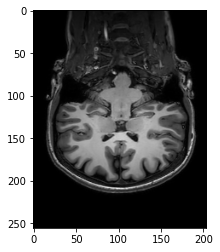

In [35]:
qq.__view_sample__()

In [36]:
qq.get_template()

{'resolution': 2,
 'translation_x': 0,
 'translation_y': 0,
 'warp': False,
 'rotation': 0,
 'patches': True}

In [ ]:
test = sr_gen('./data/nii_HR_ax/','./data/nii_HR_sag/')
test.inp_files

In [34]:
a = {'1','2','3','2'}
b = {'1','2'}

In [1]:
a = {'b':20,
'c':50}

In [2]:
a

{'b': 20, 'c': 50}

In [4]:
**a

SyntaxError: invalid syntax (<ipython-input-4-57e2a59d8f90>, line 1)